In [10]:
import turicreate as t

In [11]:
data = t.SFrame("50_Startups.csv")


Finished parsing file /home/gunjan/Machine_Learning/50_Startups.csv

Parsing completed. Parsed 50 lines in 0.086817 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/gunjan/Machine_Learning/50_Startups.csv

Parsing completed. Parsed 50 lines in 0.034183 secs.

In [12]:
data

R&D Spend,Administration,Marketing Spend,State,Profit
165349.2,136897.8,471784.1,New York,192261.83
162597.7,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94
131876.9,99814.71,362861.36,New York,156991.12
134615.46,147198.87,127716.82,California,156122.51
130298.13,145530.06,323876.68,Florida,155752.6
120542.52,148718.95,311613.29,New York,152211.77
123334.88,108679.17,304981.62,California,149759.96


In [13]:
data.show()

Materializing SFrame

In [14]:
training_set ,test_set = data.random_split(.8, seed = 0)

In [17]:
model = t.linear_regression.create(training_set,target = 'R&D Spend',features=['State'])

Linear regression:

--------------------------------------------------------

Number of examples          : 43

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.000869     | 165349.200000      | 88880.952186                    |

| 1         | 2        | 1.068139     | 96198.802711       | 46789.225912                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [19]:
print (test_set['R&D Spend'].mean())

65284.56142857143


In [20]:
 print (model.evaluate(test_set))

{'max_error': 59798.72401538007, 'rmse': 33268.380915934154}


In [21]:
model.coefficients

name,index,value,stderr
(intercept),None,73800.35390538772,12128.025485460545
State,California,-7401.456616772041,17435.135154549618
State,Florida,13891.29010999234,18525.86494030331


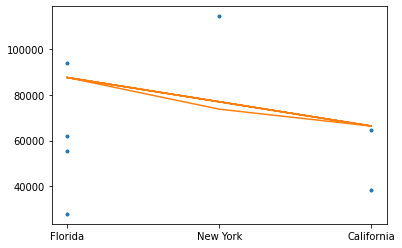

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['State'],test_set['R&D Spend'],'.',
        test_set['State'],model.predict(test_set),'-')

In [24]:
my_features = ['Administration','Marketing Spend']

In [25]:
data[my_features].show()

Materializing SFrame

In [26]:
t.show(data['Administration'],data['R&D Spend'])

Materializing X axis SArray

Materializing Y axis SArray

In [27]:
my_features_model = t.linear_regression.create(training_set,target='R&D Spend',features=my_features)

Linear regression:

--------------------------------------------------------

Number of examples          : 43

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.000100     | 165349.200000      | 88880.952186                    |

| 1         | 2        | 0.000323     | 93394.947208       | 30486.773939                    |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [28]:
print (my_features)

['Administration', 'Marketing Spend']


In [29]:
print (model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 59798.72401538007, 'rmse': 33268.380915934154}
{'max_error': 26808.062338673262, 'rmse': 16507.278497725583}
